In [ ]:
import numpy as np 
import pandas as pd
from interface import pandas_estimate_parameters

df = pd.read_csv("example_data.csv", decimal=",", sep=";")
df.head()


,species,cultivar_variety,family,plant_functional_type,population_year,refkey,gm_original,gm_original_SD,gm_original_SE,number_of_measurements,...,included_in_Knauer_et_al_2022,mesophyll_thickness,stomatal_conductance,substomatal_conc,compensation_point,ias_conductance,mesophyll_conductance*,d_mesophyll_conductance*,d_stomatal_conductance,d_ias_conductance
0,Abies alba,NaN,Pinaceae,evergreen gymnosperms,NaN,Peguero-Pina_2012,0.081,NaN,0.011,NaN,...,1,436.0,0.116,195.000000,39.8982,0.787479,0.047388,0.004739,0.0116,0.078748
1,Abies alba,NaN,Pinaceae,evergreen gymnosperms,NaN,Peguero-Pina_2012,0.068,NaN,0.004,NaN,...,1,436.0,0.116,195.000000,39.8982,0.787479,0.047388,0.004739,0.0116,0.078748
2,Abies pinsapo,NaN,Pinaceae,evergreen gymnosperms,NaN,Peguero-Pina_2012,0.140,NaN,0.025,NaN,...,1,792.0,0.087,181.000000,39.8982,0.108378,0.081785,0.008178,0.0087,0.010838
3,Abies pinsapo,NaN,Pinaceae,evergreen gymnosperms,NaN,Peguero-Pina_2012,0.162,NaN,0.032,NaN,...,1,792.0,0.087,181.000000,39.8982,0.108378,0.081785,0.008178,0.0087,0.010838
4,Abies pinsapo,NaN,Pinaceae,evergreen gymnosperms,NaN,Peguero-Pina_2016b,0.137,NaN,0.016,6.0,...,1,809.0,0.066,225.757576,39.8982,0.137930,0.061875,0.006187,0.0066,0.013793


#### Estimate ($\tau, \gamma$) from known: $g_s,\; g_{IAS},\; g_m^*$

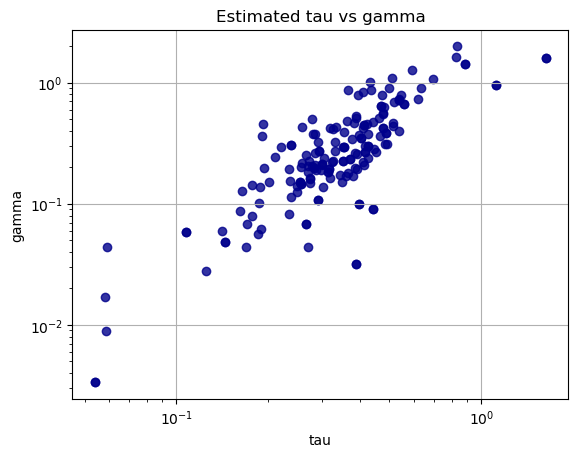

In [5]:
import matplotlib.pyplot as plt

# declare mapping from expected to actual column names
column_map = {
    "gs": "stomatal_conductance",
    "gias": "ias_conductance",
    "gm_star": "mesophyll_conductance*",
}
df1 = df.copy()

df1 = pandas_estimate_parameters(df1, column_map=column_map)
taus = df1["tau"].to_numpy()
gammas = df1["gamma"].to_numpy()    


plt.scatter(taus, gammas, marker="o", color="darkblue", alpha=0.8)
plt.xlabel("tau")
plt.ylabel("gamma")
plt.xscale("log")
plt.yscale("log")
plt.title("Estimated tau vs gamma")
plt.grid()
plt.show()


#### Estimate ($\tau, \gamma$) from known: $g_s,\; g_{IAS},\; A_N,\; C_i,\; C^*$

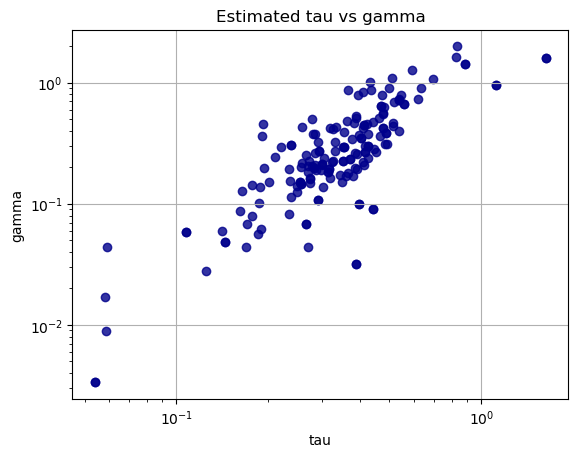

In [6]:
import matplotlib.pyplot as plt

# declare mapping from expected to actual column names
column_map = {
    "gs": "stomatal_conductance",
    "gias": "ias_conductance",
    "An": "An",
    "Ci": "substomatal_conc",
    "C_star": "compensation_point"
}
df2 = df.copy()

df2 = pandas_estimate_parameters(df2, column_map=column_map)
taus = df2["tau"].to_numpy()
gammas = df2["gamma"].to_numpy()    


plt.scatter(taus, gammas, marker="o", color="darkblue", alpha=0.8)
plt.xlabel("tau")
plt.ylabel("gamma")
plt.xscale("log")
plt.yscale("log")
plt.title("Estimated tau vs gamma")
plt.grid()
plt.show()

#### Estimate ($\tau, \gamma$) from known: $g_s,\; g_{IAS},\; A_N,\; C_a,\; C^*$

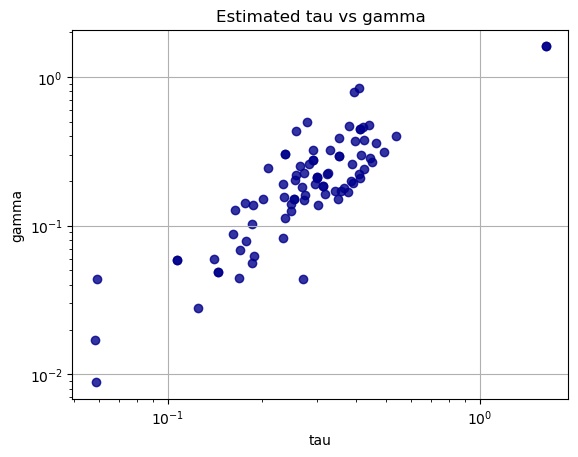

In [8]:
import matplotlib.pyplot as plt

# declare mapping from expected to actual column names
column_map = {
    "gs": "stomatal_conductance",
    "gias": "ias_conductance",
    "An": "An",
    "Ca": "Ca_gas_exchange",
    "C_star": "compensation_point"
}
df3 = df.copy()

df3 = pandas_estimate_parameters(df3, column_map=column_map)
taus = df3["tau"].to_numpy()
gammas = df3["gamma"].to_numpy()    


plt.scatter(taus, gammas, marker="o", color="darkblue", alpha=0.8)
plt.xlabel("tau")
plt.ylabel("gamma")
plt.xscale("log")
plt.yscale("log")
plt.title("Estimated tau vs gamma")
plt.grid()
plt.show()

#### Less data points appear because $Ca$ is not provided or valid for some entries